#  YAPAY ZEKA SİSTEMLERİ DERSİ PROJE ÖDEVİ

**Adınız:** Halil
**Soyadınız:** Yaşar
**Okul Numaranız:** 2212721026
**Senaryo:** 6 (Kargo Kutusu Tasarımı)
**GitHub Repo Bağlantısı:** (https://github.com/halilyasar1/yapayzekaproje1)

Optimizasyon başlatıldı...

------------------------------
SONUÇLAR
------------------------------
En İyi x1 (Genişlik): 34.54 cm
En İyi x2 (Yükseklik): 17.37 cm
Alan (x1*x2):         599.86 cm^2
Amaç Fonksiyonu (y):  450.4118


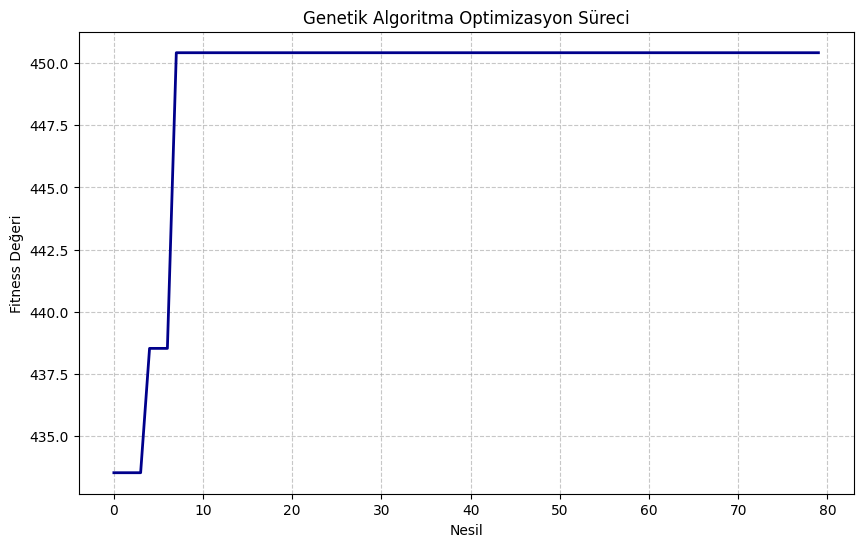

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# --- PARAMETRELER VE SABİTLER ---
POPULATION_SIZE = 30     # Popülasyon büyüklüğü
GENERATIONS = 80         # Nesil sayısı
MUTATION_RATE = 0.1      # Mutasyon oranı

# Değişken Sınırları (Senaryo 6 Kısıtları)
# x1 (Genişlik): [15, 40] -> Kısıtlarda x1 >= 15 belirtilmiş
# x2 (Yükseklik): [5, 20]
X1_BOUNDS = [15, 40]
X2_BOUNDS = [5, 20]

def fitness_function(x1, x2):
    """
    Amaç fonksiyonu: y = x1*x2 - 0.1*x1^2 - 0.1*x2^2
    Kısıt: x1 * x2 <= 600 (Raf sığdırma sınırı)
    """
    score = (x1 * x2) - (0.1 * x1**2) - (0.1 * x2**2)

    # Ceza Yöntemi (Penalty Method)
    # Eğer alan 600'ü geçerse skoru ciddi oranda düşür
    if (x1 * x2) > 600:
        score -= 5000

    return score

def create_individual():
    """Rastgele genlere sahip birey oluşturur."""
    x1 = random.uniform(X1_BOUNDS[0], X1_BOUNDS[1])
    x2 = random.uniform(X2_BOUNDS[0], X2_BOUNDS[1])
    return [x1, x2]

def create_population(size):
    """Başlangıç popülasyonunu yaratır."""
    return [create_individual() for _ in range(size)]

def crossover(parent1, parent2):
    """İki ebeveynden gen aktarımı ile çocuk üretir."""
    child = [parent1[0], parent2[1]]
    return child

def mutate(individual):
    """Belirli olasılıkla genlerde rastgele değişim yapar."""
    if random.random() < MUTATION_RATE:
        individual[0] += random.uniform(-1, 1)
        # Sınır kontrolü (Clamping)
        individual[0] = max(X1_BOUNDS[0], min(individual[0], X1_BOUNDS[1]))

    if random.random() < MUTATION_RATE:
        individual[1] += random.uniform(-1, 1)
        individual[1] = max(X2_BOUNDS[0], min(individual[1], X2_BOUNDS[1]))

    return individual

# --- ANA ALGORİTMA DÖNGÜSÜ ---
population = create_population(POPULATION_SIZE)
best_fitness_history = []
best_solution = None
max_fitness = -float('inf')

print("Optimizasyon başlatıldı...")

for generation in range(GENERATIONS):
    # Her bireyin uygunluk değerini hesapla
    scores = []
    for ind in population:
        score = fitness_function(ind[0], ind[1])
        scores.append((score, ind))

    # Puanı yüksek olanları öne al
    scores.sort(key=lambda x: x[0], reverse=True)

    # En iyi sonucu kaydet
    current_best_score = scores[0][0]
    best_fitness_history.append(current_best_score)

    if current_best_score > max_fitness:
        max_fitness = current_best_score
        best_solution = scores[0][1]

    # Seçim: Popülasyonun en iyi %50'sini ebeveyn olarak seç
    top_half = scores[:POPULATION_SIZE // 2]
    parents = [x[1] for x in top_half]

    # Yeni Nesil Oluşturma
    new_population = []

    # Elitizm: En iyi 2 bireyi doğrudan aktar
    new_population.extend(parents[:2])

    while len(new_population) < POPULATION_SIZE:
        p1 = random.choice(parents)
        p2 = random.choice(parents)

        child = crossover(p1, p2)
        child = mutate(child)

        new_population.append(child)

    population = new_population

# --- SONUÇLARI GÖRSELLEŞTİRME ---
print("\n" + "-"*30)
print("SONUÇLAR")
print("-" * 30)
print(f"En İyi x1 (Genişlik): {best_solution[0]:.2f} cm")
print(f"En İyi x2 (Yükseklik): {best_solution[1]:.2f} cm")
print(f"Alan (x1*x2):         {best_solution[0]*best_solution[1]:.2f} cm^2")
print(f"Amaç Fonksiyonu (y):  {max_fitness:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(best_fitness_history, linewidth=2, color='darkblue')
plt.title('Genetik Algoritma Optimizasyon Süreci')
plt.xlabel('Nesil')
plt.ylabel('Fitness Değeri')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()